In [ ]:
import pandas as pd
import requests
from io import StringIO
from PreProcess import preprocess

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
response = requests.get(url)
data = response.text
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
    'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv(StringIO(data), delim_whitespace=True, names=column_names)
output_file = "housing_data.csv"
df.to_csv(output_file, index=False)

In [4]:
df = preprocess("housing_data.csv", "MEDV", ["RM", "AGE", "DIS", "LSTAT"])

In [7]:
import matplotlib.pyplot as plt

In [9]:
def plot_features_with_label(df, label_column, feature_columns):

    num_features = len(feature_columns)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for i, feature in enumerate(feature_columns):
        axes[i].scatter(df[feature], df[label_column], alpha=0.6)
        axes[i].set_title(f"{feature} vs {label_column}", fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel(label_column, fontsize=12)
        axes[i].grid(True, linestyle='--', alpha=0.7)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

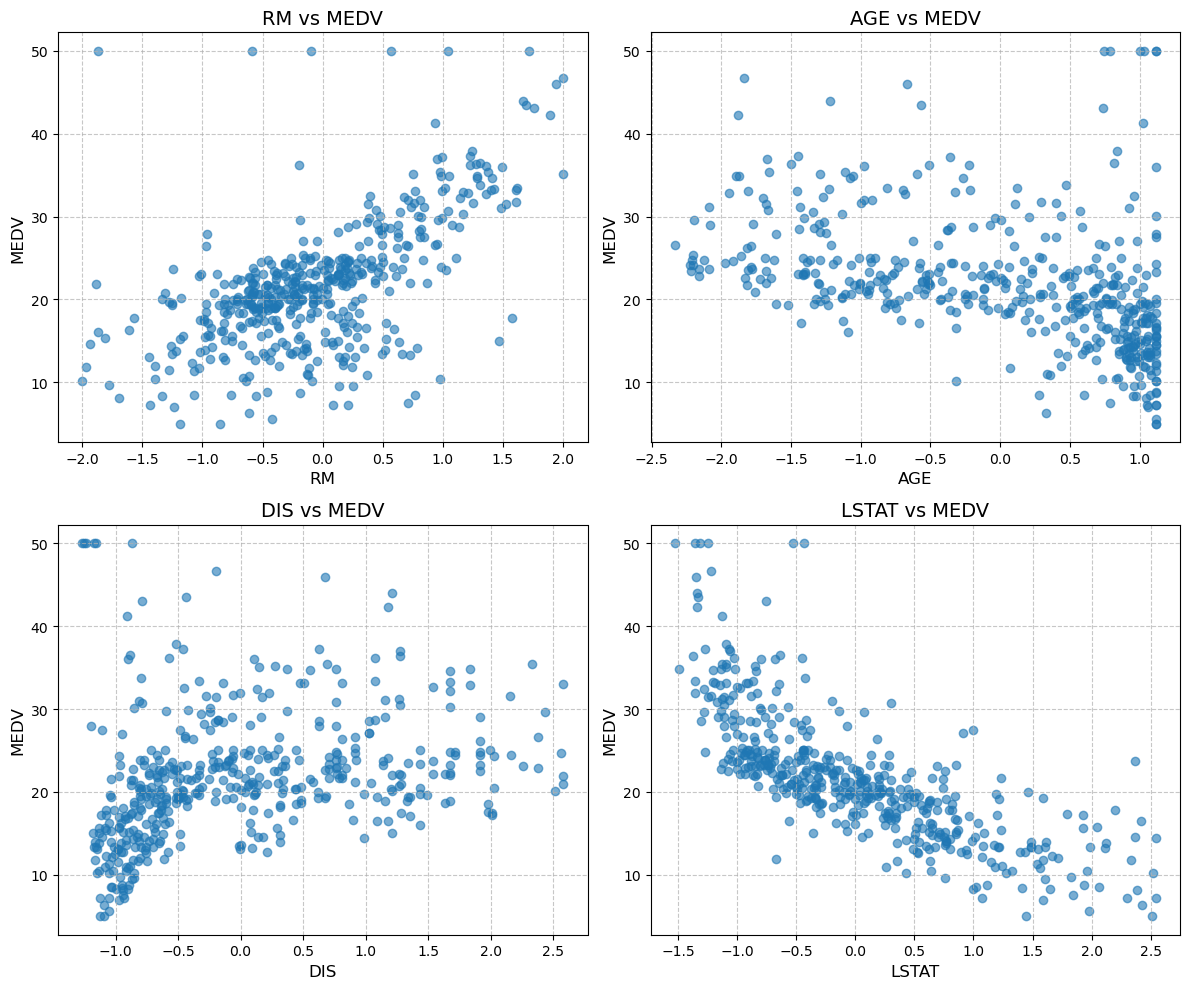

In [10]:
plot_features_with_label(df, "MEDV", ["RM", "AGE", "DIS", "LSTAT"])